In [ ]:
from tensorboard.backend.event_processing import event_accumulator

#加载日志数据
ea=event_accumulator.EventAccumulator(r'..\backup\events.out.tfevents.1716038967.DESKTOP-P1IIRLN') 
ea.Reload()
[print(i) for i in ea.scalars.Keys()]


In [ ]:
len(ea.scalars.Items('performance/step_inference_rl_update_fps'))

In [ ]:

val_acc=ea.scalars.Items('performance/step_inference_rl_update_fps')
print(len(val_acc))
print([(i.step,i.value) for i in val_acc])

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,4))
ax1=fig.add_subplot(111)
val_acc=ea.scalars.Items('performance/step_inference_rl_update_fps')
ax1.plot([i.step for i in val_acc],[i.value for i in val_acc],label='val_acc')
ax1.set_xlim(0)
acc=ea.scalars.Items('performance/step_inference_fps')
ax1.plot([i.step for i in acc],[i.value for i in acc],label='acc')
ax1.set_xlabel("step")
ax1.set_ylabel("")

plt.legend(loc='lower right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

# Load the event data
log_path = r'..\backup\events.out.tfevents.1716038967.DESKTOP-P1IIRLN'
ea = event_accumulator.EventAccumulator(log_path)
ea.Reload()

# Get all scalar keys
scalar_keys = ea.scalars.Keys()

# Plot all scalar metrics
for key in scalar_keys:
    # Retrieve scalar events for the key
    events = ea.Scalars(key)
    
    # Extract wall time, steps, and values
    steps = [e.step for e in events]
    values = [e.value for e in events]
    
    # Create a plot for the scalar metric
    plt.figure()
    plt.plot(steps, values)
    plt.title(key)
    plt.xlabel('Steps')
    plt.ylabel('Value')
    plt.grid(True)
    
    # Save the plot as a PNG file (optional)
    # plt.savefig(f'{key}.png')
    
    # Show the plot
    plt.show()


C:\Users\Simon\AppData\Local\Temp\ipykernel_10988\4178914177.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = stats_df._append({


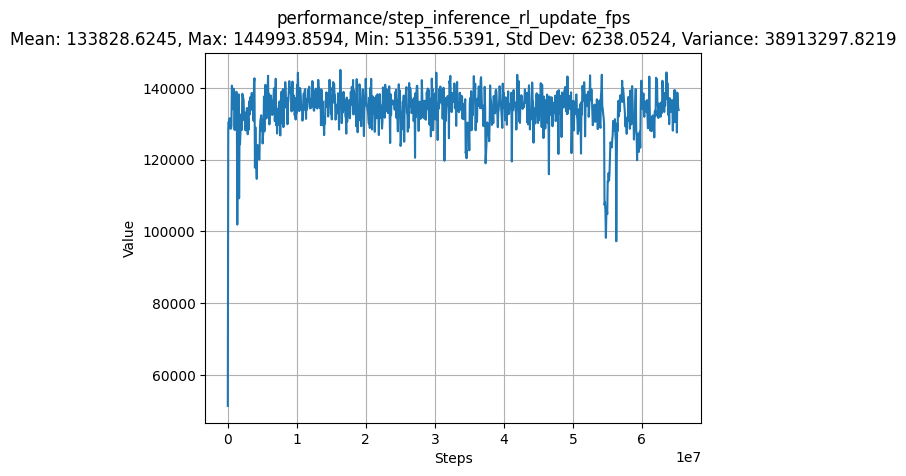

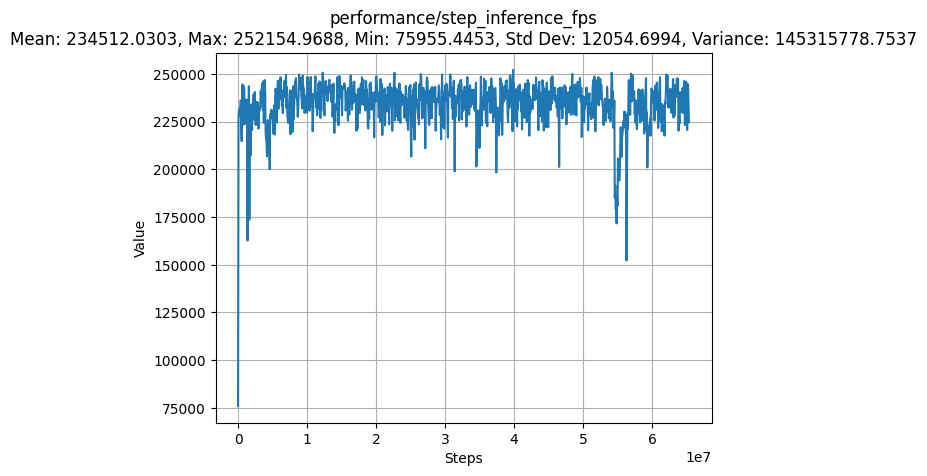

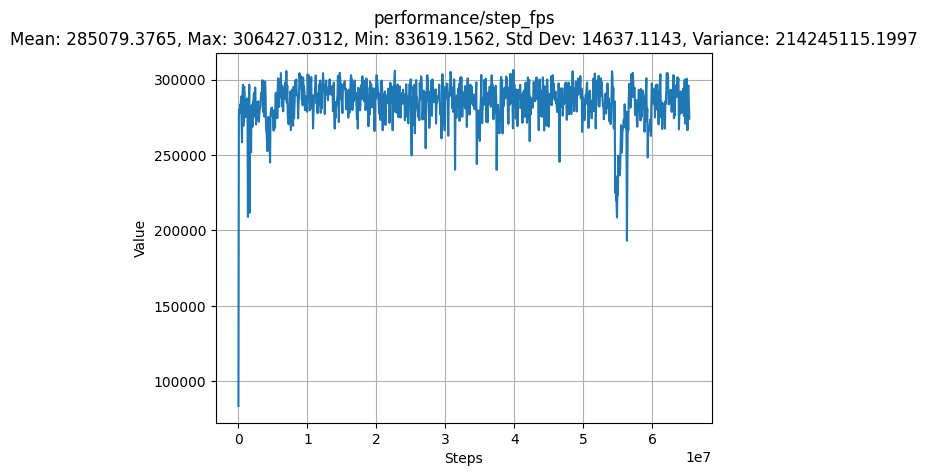

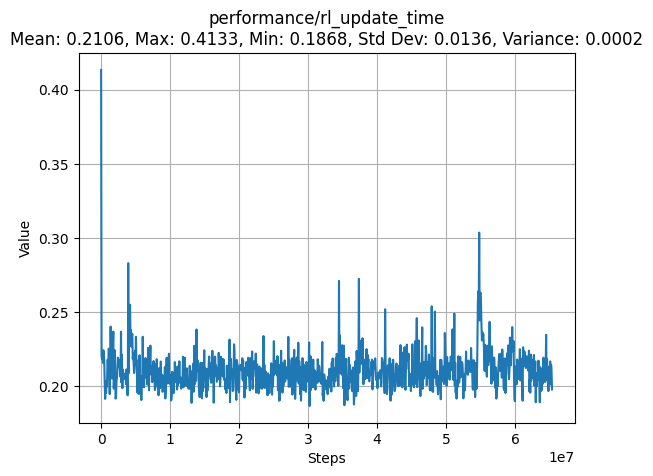

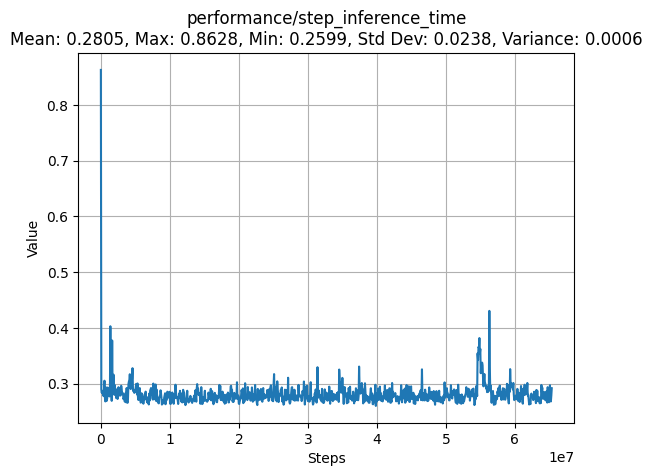

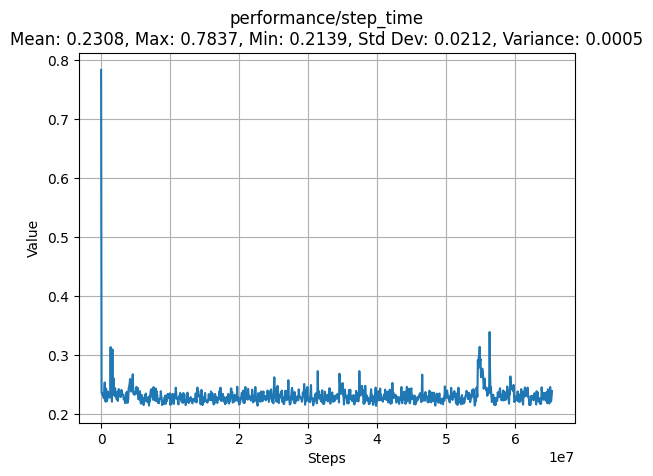

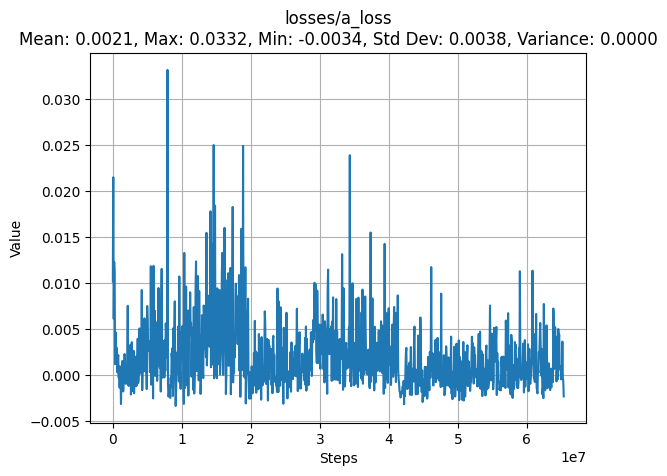

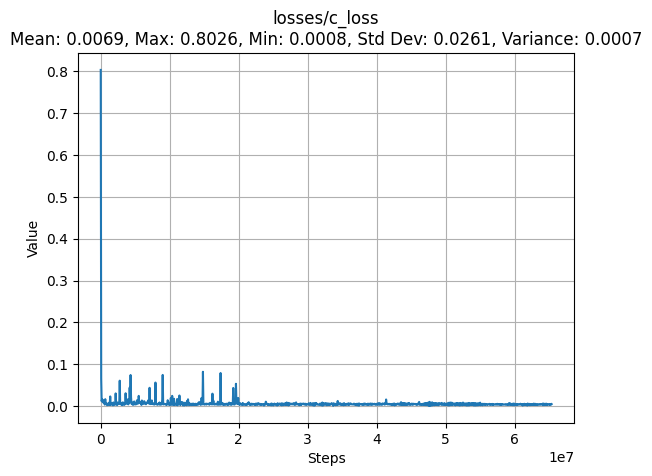

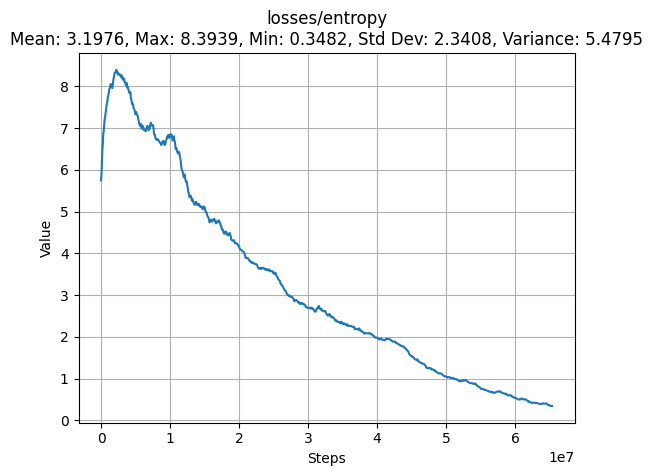

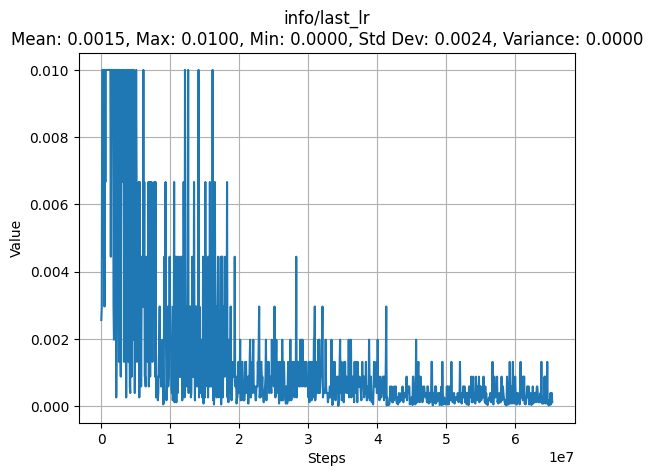

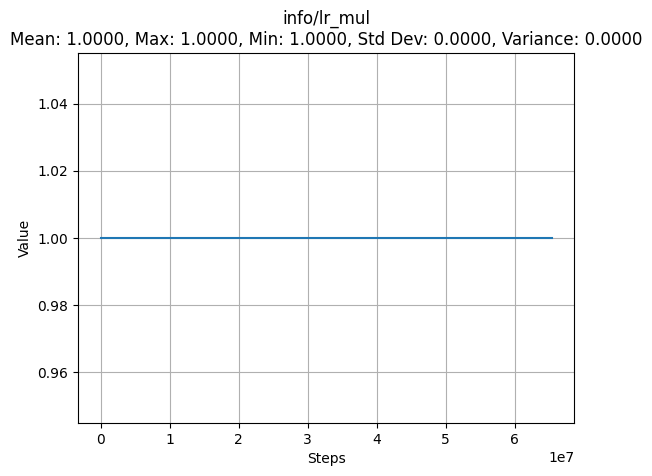

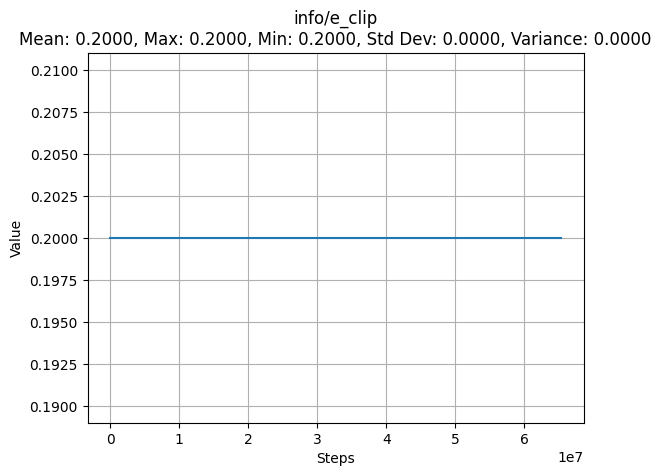

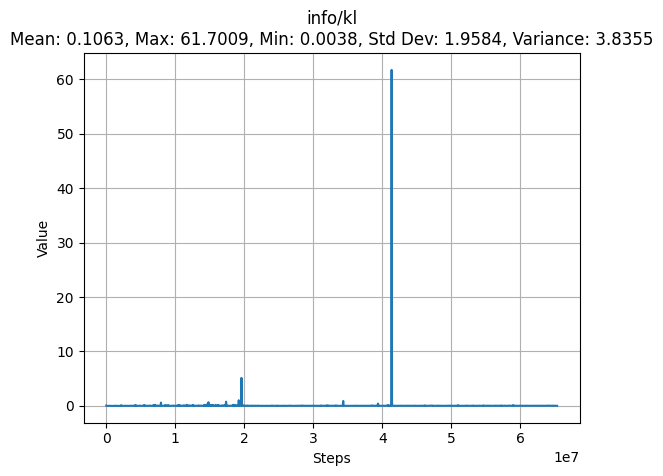

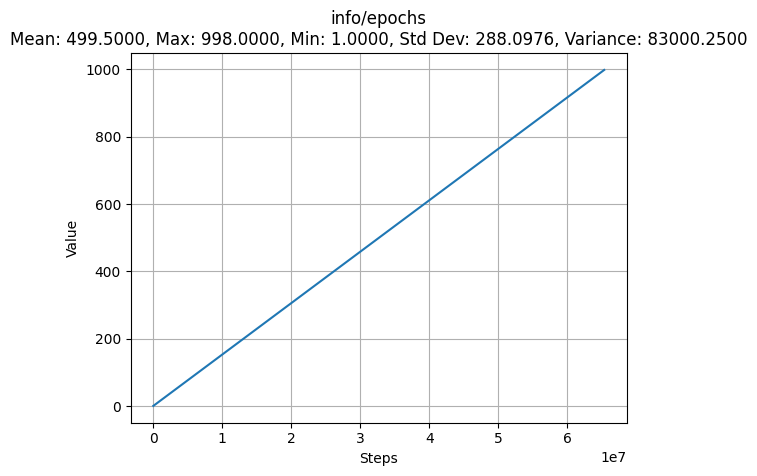

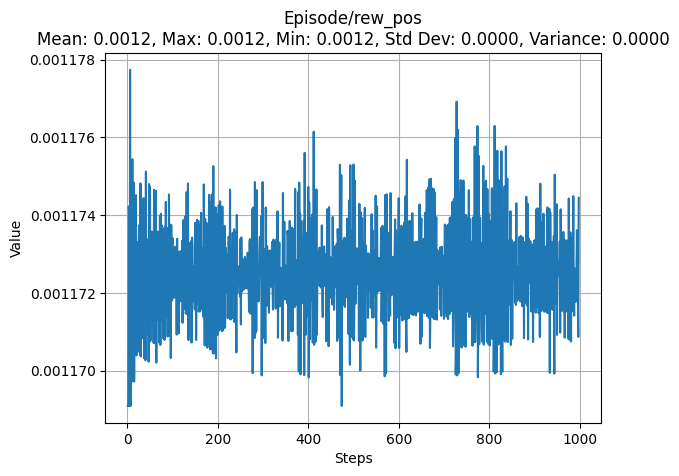

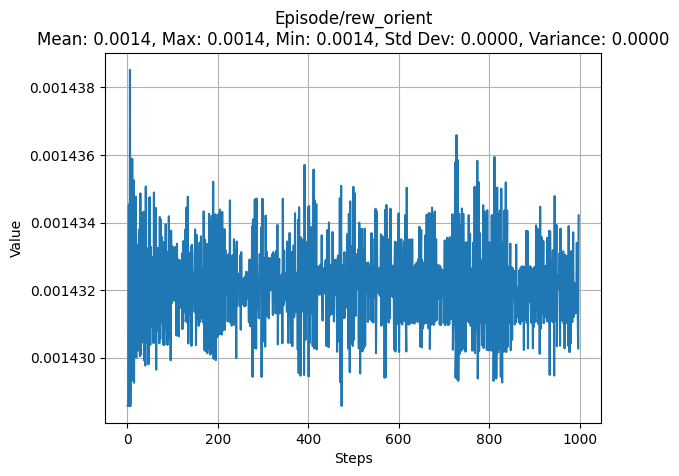

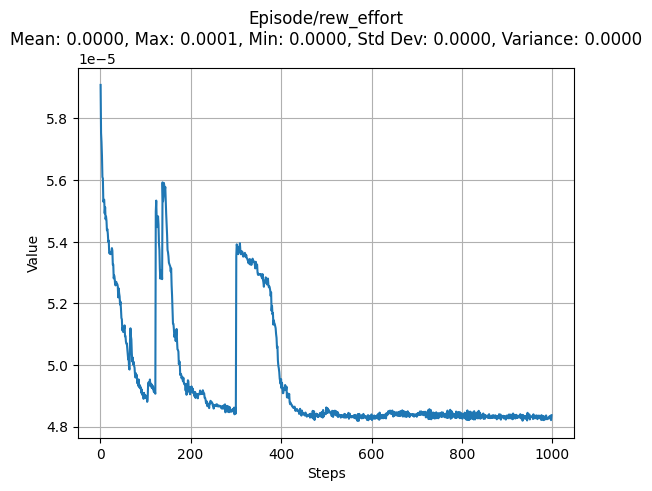

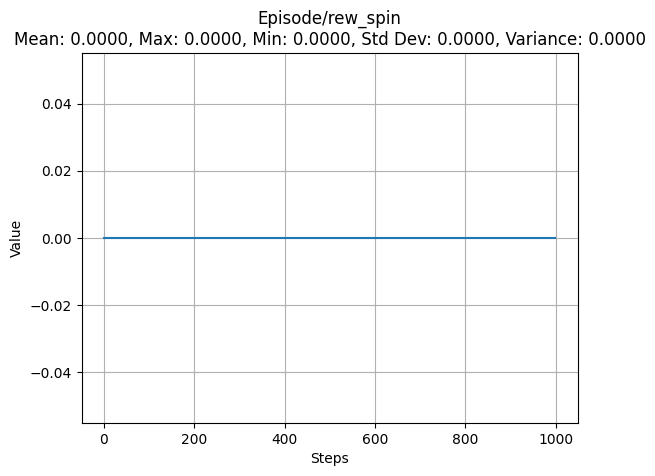

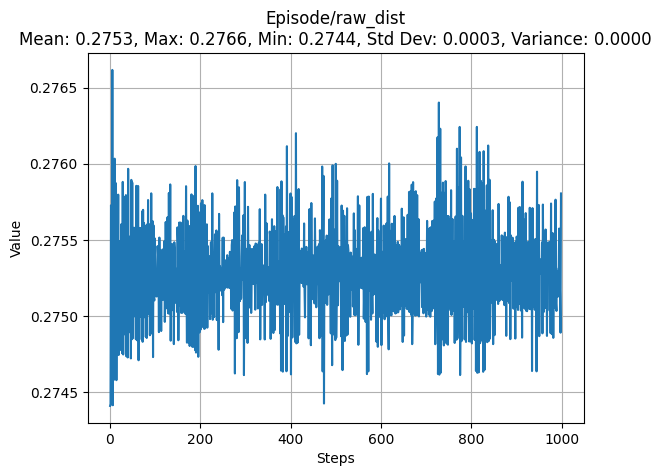

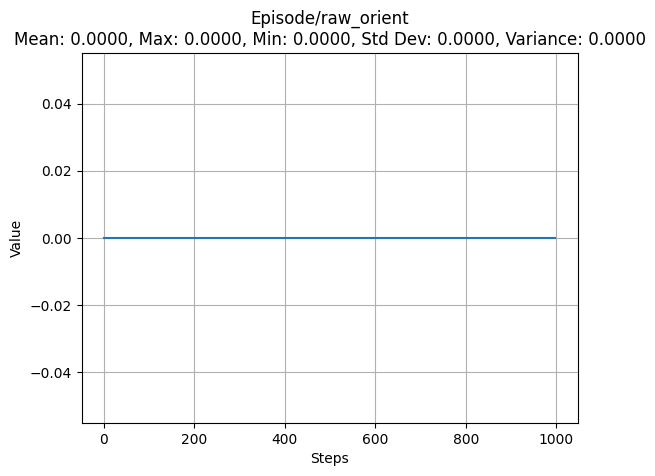

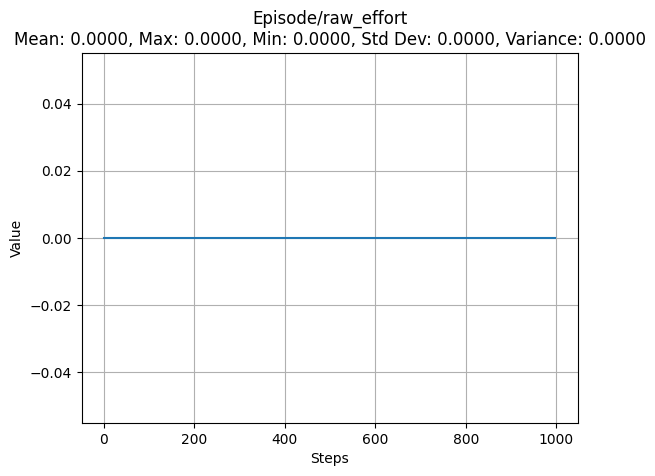

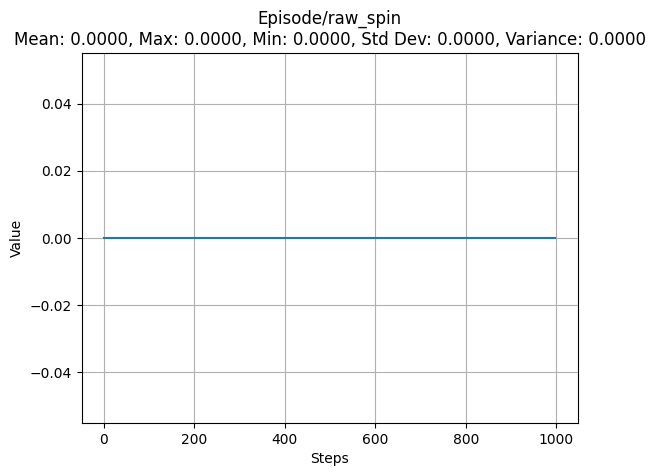

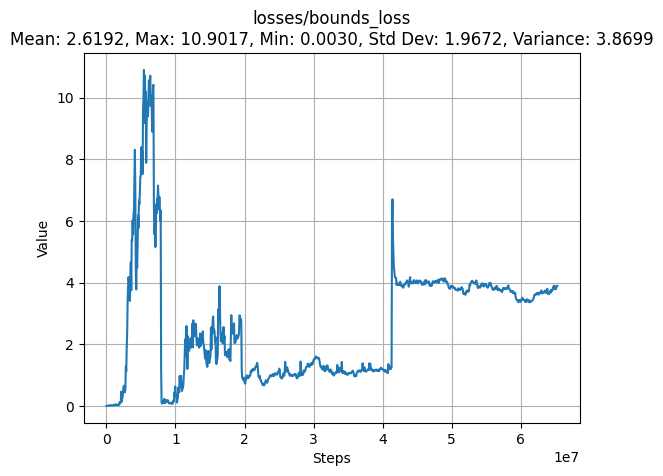

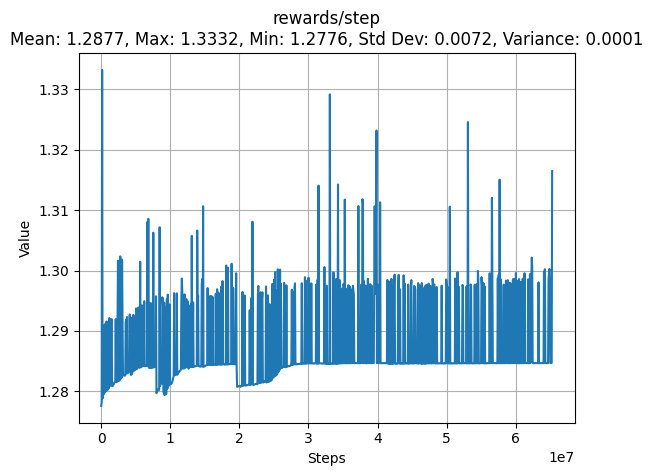

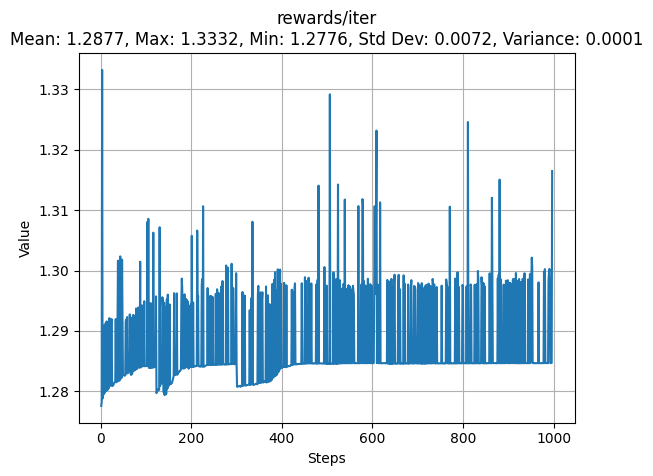

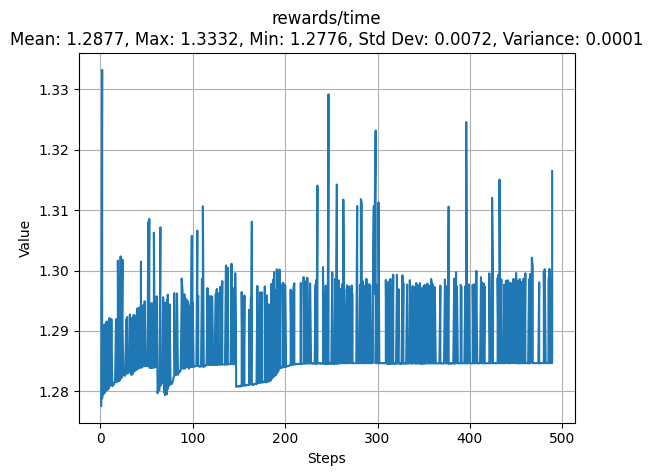

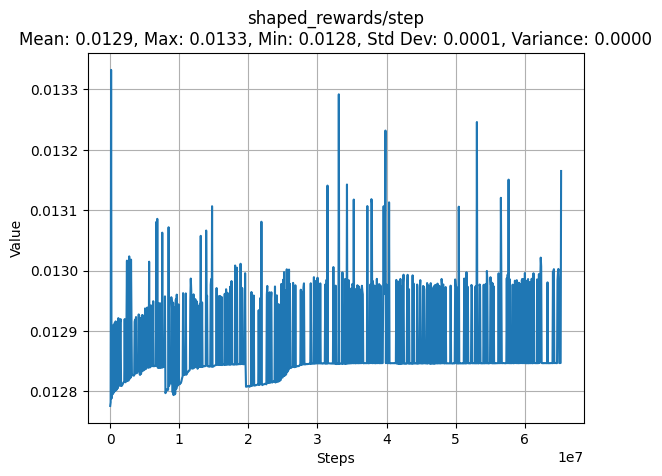

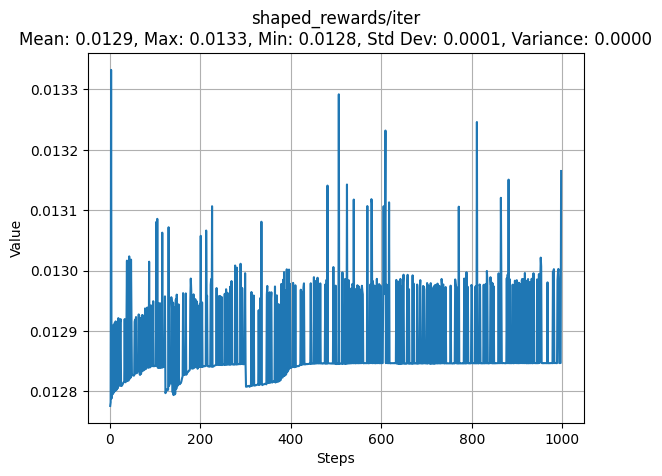

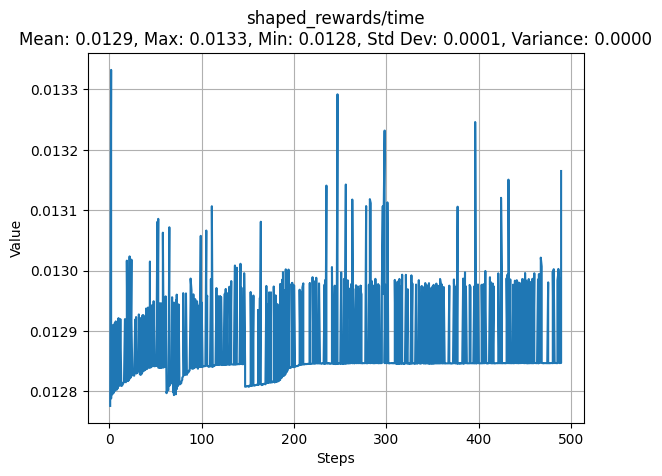

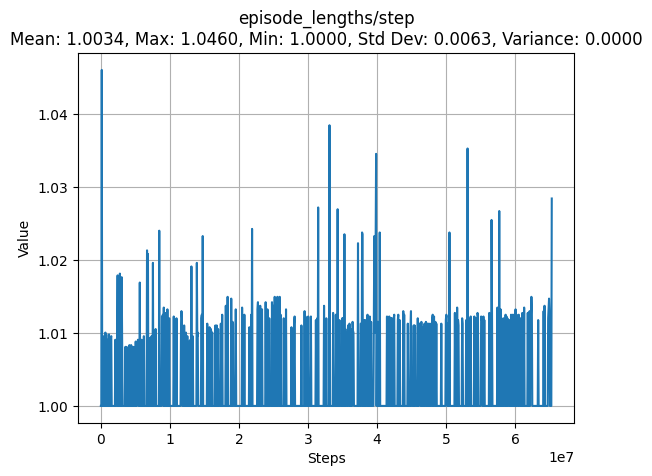

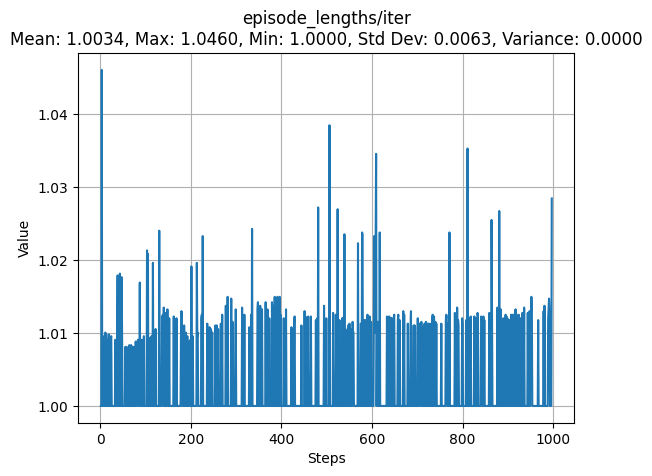

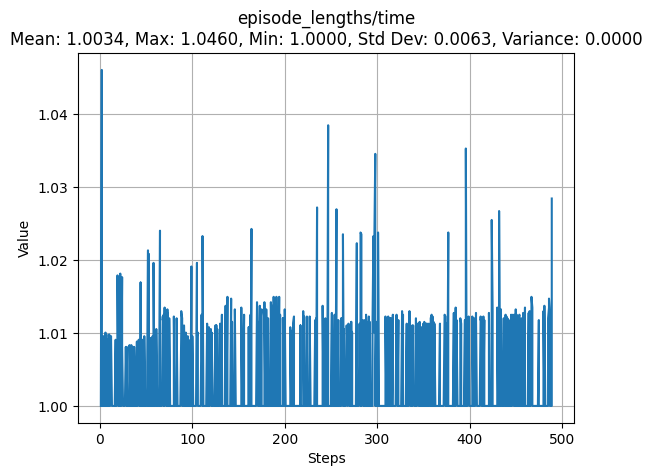

                                      Metric           Mean            Max  \
0   performance/step_inference_rl_update_fps  133828.624499  144993.859375   
1             performance/step_inference_fps  234512.030287  252154.968750   
2                       performance/step_fps  285079.376534  306427.031250   
3                 performance/rl_update_time       0.210608       0.413277   
4            performance/step_inference_time       0.280547       0.862822   
5                      performance/step_time       0.230830       0.783744   
6                              losses/a_loss       0.002059       0.033171   
7                              losses/c_loss       0.006920       0.802646   
8                             losses/entropy       3.197584       8.393908   
9                               info/last_lr       0.001453       0.010000   
10                               info/lr_mul       1.000000       1.000000   
11                               info/e_clip       0.200000     

In [29]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import numpy as np
import pandas as pd
import os

# Remove the plot directory if it exists
if os.path.exists('./plot'):
    import shutil
    shutil.rmtree('./plot')
os.makedirs('./plot')
# Load the event data
log_path = r'..\backup\events.out.tfevents.1716038967.DESKTOP-P1IIRLN'
ea = event_accumulator.EventAccumulator(log_path)
ea.Reload()

# Get all scalar keys
scalar_keys = ea.scalars.Keys()

# Function to compute descriptive statistics
def compute_statistics(values):
    mean = np.mean(values)
    max_val = np.max(values)
    min_val = np.min(values)
    std_dev = np.std(values)
    variance = np.var(values)
    return mean, max_val, min_val, std_dev, variance

# Prepare a DataFrame to store the statistics
stats_df = pd.DataFrame(columns=['Metric', 'Mean', 'Max', 'Min', 'Std Dev', 'Variance'])

# Plot all scalar metrics and compute statistics
for key in scalar_keys:
    # Retrieve scalar events for the key
    events = ea.Scalars(key)
    
    # Extract steps and values
    steps = [e.step for e in events]
    values = [e.value for e in events]
    
    # Compute statistics
    mean, max_val, min_val, std_dev, variance = compute_statistics(values)
    
    # Append statistics to the DataFrame
    stats_df = stats_df._append({
        'Metric': key,
        'Mean': mean,
        'Max': max_val,
        'Min': min_val,
        'Std Dev': std_dev,
        'Variance': variance
    }, ignore_index=True)
    
    # Create a plot for the scalar metric
    plt.figure()
    plt.plot(steps, values)
    plt.title(f'{key}\nMean: {mean:.4f}, Max: {max_val:.4f}, Min: {min_val:.4f}, Std Dev: {std_dev:.4f}, Variance: {variance:.4f}')
    plt.xlabel('Steps')
    plt.ylabel('Value')
    plt.grid(True)
    # Make sure the plot directory exists
    os.makedirs(f"./plot/{key.split('/')[0]}", exist_ok=True)
    plt.savefig(f'./plot/{key}.png',dpi=300)
    # Show the plot
    plt.show()

# Display the statistics DataFrame
print(stats_df)
stats_df.to_csv('./stats.csv', index=False)